# **[TODO Title] Overview of generative models**

<img src="https://www.pulsecarshalton.co.uk/wp-content/uploads/2016/08/jk-placeholder-image.jpg" width="60%" />

[Add prac relevant image.]

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/practicals/Generative_practical_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:**

- Jemma Daniel
- Rachel Catzel
- Exaucé Luweh Adjim Ngarti
- Taneem Ullah Jan
- Yessine Khanfir
- Mirgahney Mohamed
- Kevin Eloff

**Introduction:**

[Intro to the topic. Probably between 3-5 lines.]

**Topics:**

Content: [e.g. Reinforcement Learning, Computer Vision etc. Can be more than one.]  
Level: [Beginner, Intermediate, Advanced.]


**Aims/Learning Objectives:**

[Points on the exact learning outcomes from the prac. This should probably be <=5 things.]

**Prerequisites:**

[Knowledge required for this prac. You can link a relevant parallel track session, blogs, papers, courses, topics etc.]

**Outline:**

[Points that link to each section. Auto-generate following the instructions [here](https://stackoverflow.com/questions/67458990/how-to-automatically-generate-a-table-of-contents-in-colab-notebook).]

**Before you start:**

[Tasks just before starting.]


## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

import subprocess
import os

# Based on https://stackoverflow.com/questions/67504079/how-to-check-if-an-nvidia-gpu-is-available-on-my-system
try:
    subprocess.check_output('nvidia-smi')
    print("a GPU is connected.")
except Exception:
    # TPU or CPU
    if "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
      print("A TPU is connected.")
      import jax.tools.colab_tpu
      jax.tools.colab_tpu.setup_tpu()
    else:
      print("Only CPU accelerator is connected.")
      # x8 cpu devices - number of (emulated) host devices
      os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

import matplotlib.pyplot as plt
import numpy as np

# Other requirements
from matplotlib.lines import Line2D

from ipywidgets import interact

In [ ]:
# @title Helper Functions. (Run Cell)

## Section 1: What are generative models?

### 1.1. Introduction to Probabilistic Models

Let us first go over general probabilistic models. A generative model is a more complex example of the probabilistic models we shall discuss below.

> A *probability distribution* is a mathematical function that describes the likelihood of different possible outcomes for a given event.

For **discrete variables** (outcomes you can explicitly count), a distribution tells you the probability of each specific outcome. A classic example is a coin flip, where the possible outcomes are heads or tails, each with a probability of 1/2.

Another example is rolling a fair six-sided die.

**Group task 1:** Discuss with your neighbors what are the possible outcomes when rolling a six-sided die?

A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example, in the coin flipping example, we could use a binary random variable with $X = 1$ if the coin is heads and $X = 0$ for tails.

**Group task 2:** Discuss with your neighbors and write down a random variable to describe rolling the fair six-sided die?

#### Answer to group task 1

The outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

#### Answer to group task 2

Note that there are many possible answers, here is one:

$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$.

For **continuous variables** (outcomes that can take any value in a range), a distribution is described by a curve. For instance, imagine you are a farmer selling watermelons. Their masses don't fall into neat categories; they can be 4.5kg, 5kg, or 5.5kg. A continuous distribution curve would tell you the probability of a watermelon's mass falling within a certain range (e.g., between 4kg and 6kg).

A few key distributions form the building blocks for many models:

- **Normal (Gaussian) Distribution:** The classic "bell curve." It's defined by its **mean** (the center of the peak) and **standard deviation** (how spread out the curve is). It's incredibly common in nature and is often a good first guess for continuous data like the weight of watermelons.

- **Uniform Distribution:** The simplest case, where all outcomes in a given range are equally likely. A single roll of a fair die follows a discrete uniform distribution.

- **Mixture Models:** Many real-world datasets aren't described by a single, simple distribution. A **mixture model**, like the **Gaussian Mixture Model (GMM)**, creates a more flexible and complex distribution by combining several simpler ones. For example, if you charted the heights of a large group of dogs, you might see several peaks in your data corresponding to different breeds. A GMM could model this as a *"mixture"* of several different Normal distributions.

**Group task 3:** Discuss with your neighbors what the probability distribution describing the mass of watermelons may look like?

#### Answer to group task 3

The mass of watermelons is a continuous variable. It's likely that most watermelons will have a mass close to the average value of 5kg, with fewer being much heavier or lighter. This pattern is well-described by a **Normal (or Gaussian) distribution**. The plot below gives a rough idea of this distribution.


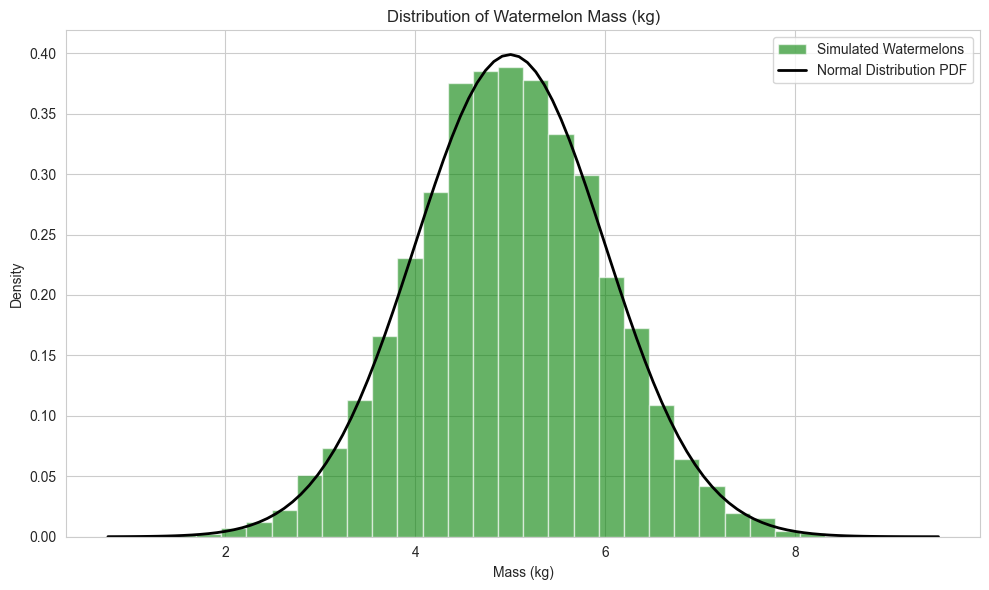

### 1.2. Overview of Generative Models
The process of finding the "best" parameters for a model based on the data is the essence of **learning** or **fitting** in machine learning. By fitting a probability model to our data, we create a representation that we can analyse, make predictions from, and, most importantly for this practical, **generate** from.

The main goal of a generative model is to learn the underlying probability distribution of a dataset. The goal is to understand the data so well that the model can create new, synthetic data points that are similar to the original data.

To understand generative models better, it's helpful to contrast them with **discriminative models**.

- **Discriminative Models:**
  > Discriminative models learn the boundary between different classes of data. Given a data point $x$, they predict a label $y$. They are concerned with the *conditional probability* $p(y|x)$, which can be interpreted to mean the probability of the output $y$ given the input $x$.
  For example, a model that looks at a picture of an animal and tells you if it's a 'cat' or a 'dog' is a discriminative model. Here the input $x$ may be an image of a cat and the output $y$ would be ‘cat’, if the model predicts correctly.

- **Generative Models:**
  > Generative models learn the joint probability distribution $p(x, y)$ of the data $x$ and labels $y$, or just $p(x)$ if there are no labels. A model that learns the joint distribution not only learns the relationship between input $x$ and output $y$, but also the relationship between output $y$ and input $x$.
  For example, we can train a generative model on images of cats. The model learns the combinations of colours, shapes, and textures that make an image look like a cat. Because they model how the data is generated, they can create new data points. In our example, the model can learn to generate novel, realistic pictures of cats. Because the model has learnt what features make up a cat, it would also be able to predict the label “cat” if given an image of a cat.

Let us make this more general and consider the task of modelling data from two different classes.

**Discriminative:** In this case, we are interested in learning a probability distribution $p(y|x)$, i.e., the  probability of the class $y$ being either 0 or 1 given an example $x$. For any example $x$, we can determine whether it is more likely to be from class 0 or class 1, and draw a corresponding decision boundary where $p(y = 0|x) = p(y = 1|x)$.

**Generative:** Here, we are interested in learning the probability distribution $p(x|y)$, i.e., the probability of observing some data $x$ given that it is from class $y$. We might also be interested in learning the probability distribution $p(x)$ which is the probability of observing $x$ in either of the classes. *The cool thing about generative modelling is that if we can sample $x \sim p(x|y)$ or $x \sim p(x)$ we can generate new unseen examples*.


Below we can see a visual comparison between discriminative and generative models.

<img src="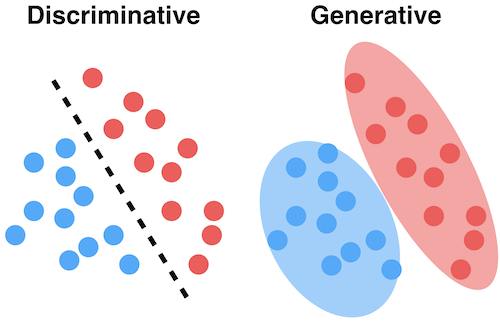
" width="60%" />

*In the picture above ([source](https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/)), red and blue dots represent examples ($x$) from classes $y = 0$ and $y = 1$, respectively. The dashed black line shows the decision boundary in the discriminative case. In the generative case, the light red and blue ovals show the areas where $p(y = 0|x)$ and $p(y = 1|x)$ are large, respectively.*

### 1.3. Why Do We Need Generative Models?

Generative models are powerful tools for creativity, understanding, and exploration. Their applications can be grouped into a few key themes:

- **To Create & Augment:** This is the most famous use case. We can generate novel content like art, music, and virtual worlds.
  - **Art & Design:** Models like **DALL-E 3** and **Midjourney** can generate stunningly detailed images from simple text prompts (e.g., "an astronaut riding a horse in a photorealistic style").
  - **Music & Text:** AI can compose music in the style of Bach or create entirely new genres. Large Language Models (LLMs) like **GPT-4** can write everything from poetry and screenplays to functional computer code.
  - **Data Augmentation:** This is a critical application. If you're building a model to detect a rare type of cancer from medical scans, you might have very few real examples. A generative model can create more realistic, synthetic scans of that cancer, providing a richer dataset to train a more accurate diagnostic model.

- **To Understand, Simulate & Predict:** To generate realistic data, a model must learn the underlying rules and structure of the world it's modeling. This deep "understanding" can be used for complex simulations and predictions.
  - **Simulation & Prediction:** In physics, we can simulate complex particle interactions that are too difficult to model with traditional equations. In finance, generative models can simulate potential stock market trajectories to better estimate the risk of extreme events.
  - **Anomaly Detection:** Beyond just spotting unusual network traffic, this is crucial for fraud detection. A model trained on a user's normal spending patterns can instantly flag a transaction that is highly improbable (e.g., a small purchase in one country followed two minutes later by a large withdrawal in another country), preventing fraud.
  - **Robotics & Autonomous Vehicles:** A self-driving car can use a generative model to simulate thousands of possible future scenarios in milliseconds (e.g., "what if that pedestrian steps into the road?") to plan the safest possible action.

- **To Explore & Discover:** Generative models allow us to explore the entire space of possible data, asking "what if" questions and discovering novel solutions.
  - **Drug Discovery:** This is a revolutionary application. Instead of manually testing thousands of existing molecules, scientists can use a generative model to design entirely new molecules with specific desired properties (e.g., "design a molecule that strongly binds to this specific protein but has low toxicity"). This has the potential to drastically accelerate the search for new medicines.
  - **Material Science:** Similarly, models can invent new materials with target characteristics, like a new alloy that is both lightweight and extremely strong, or a new polymer that is biodegradable.


Before moving on, make sure you have a working grasp of the following. If you’re already comfortable, feel free to skip ahead to Section 1.4. Don’t spend too much time here, **a more detailed online session will be scheduled later**.

- **Probability Distributions**  
- **Latent vs. Observed Variables**  
- **Bayes’ Rule**  
- **Likelihood & Maximum Likelihood Estimation (MLE)**  
- **Evidence Lower Bound (ELBO)**



### Probability Distributions



A probability distribution describes how likely different outcomes are for a random variable. For a discrete variable, it assigns a probability to each possible value (summing to 1). For a continuous variable, it’s described by a probability density function (PDF) that integrates to 1 over all values.

Example: The distribution of a fair coin toss is 50% Heads, 50% Tails. The distribution of heights in a population can be modeled by a continuous curve (e.g. a normal distribution).

**Below is a code example using JAX to visualize a simple distribution. You can adjust parameters to see how the distribution changes.**

#### Bernoulli distribution

In [ ]:
# Plot a Bernoulli distribution with probability p of success
def plot_bernoulli(p=0.5):
    outcomes = jnp.array([0, 1])
    probs = jnp.array([1-p, p])
    plt.bar(outcomes, probs, width=0.4)
    plt.xticks([0, 1], labels=["0 (Failure)", "1 (Success)"])
    plt.ylim(0, 1)
    plt.title(f"Bernoulli Distribution (p={p:.2f})")
    plt.ylabel("Probability")
    plt.show()

interact(plot_bernoulli, p=(0.0, 1.0, 0.1));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

#### Normal distrbution

In [ ]:
# Plot a Normal distribution with fixed axes
def plot_normal(mu=0.0, sigma=1.0):
    x = jnp.linspace(-10, 10, 500)  # Fixed x-axis range
    coeff = 1.0 / (sigma * jnp.sqrt(2 * jnp.pi))
    pdf = coeff * jnp.exp(-0.5 * ((x - mu) / sigma)**2)

    plt.plot(x, pdf)
    plt.title(f"Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.xlim(-10, 10)              # Fixed x-axis
    plt.ylim(0, 0.5)               # Fixed y-axis
    plt.grid(True)
    plt.show()

interact(plot_normal, mu=(-5.0, 5.0, 0.5), sigma=(0.1, 5.0, 0.1));


interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

#### Code Task

**Challenge : Complete the code below to compute the mean of a discrete distribution defined by a list of outcomes and their probabilities. Use jax.numpy for computation.**

In [ ]:
outcomes = jnp.array([0, 1, 2, 3])
probs = jnp.array([0.1, 0.3, 0.4, 0.2])
# TODO: compute the expected value (mean) of the distribution
expected_value = jnp.sum(outcomes * probs)  # replace None with the computation
print("Expected value:", expected_value)


Expected value: 1.7


### Latent and observed Variables






In many probabilistic models, we distinguish between **observed variables** (the data we have) and **latent variables** (hidden or unobserved factors that influence the data). Latent variables help explain the structure or variability in the observations.

These unobserved variables are not directly measured but are assumed to generate or influence the observed data. For instance, in a **mixture of Gaussians**, the latent variable might indicate which Gaussian component generated a given data point, even though that label is not present in the dataset.



#### **Example**

Suppose our observed data $x$ consists of images of handwritten digits. A latent variable $z$ might represent:

- The digit class (0 through 9)
- Style attributes (stroke width, orientation, etc.)

We do not observe $z$ in the dataset, but it determines the appearance of $x$. In this case, the latent variable captures meaningful structure in the data generation process.



#### **Latent Variable Model**s

A **latent variable model** defines a joint distribution over observed and latent variables:

$$
p(x, z) = p(z) \cdot p(x \mid z)
$$

Where:

- $p(z)$ is the **prior** distribution over the latent variable. It is usually simple (e.g., standard normal).
- $p(x \mid z)$ is the **likelihood**, or generative model, describing how the data is generated from the latent.


#### **Marginal Likelihood of Observed Data**

Since we do not observe $z$, we obtain the **marginal distribution** over the observed data $x$ by summing or integrating over all possible values of the latent:

- **Discrete latent space:**

$$
p(x) = \sum_z p(z) \cdot p(x \mid z)
$$

- **Continuous latent space:**

$$
p(x) = \int p(z) \cdot p(x \mid z) \, dz
$$

This marginalization step is critical in generative modeling, but it is often computationally intractable, especially in the continuous case. This leads to the need for **approximate inference techniques** such as variational inference or Monte Carlo sampling.



### Bayes’ Rule




Bayes’ Rule allows us to compute the **posterior probability** of a latent variable $X$ given an observation $Y$:

$$
P(X \mid Y) = \frac{P(Y \mid X) \cdot P(X)}{P(Y)}
$$

This requires that $P(Y) \ne 0$. The components are:

- $P(X)$: prior, belief about $X$ before seeing $Y$
- $P(Y \mid X)$: likelihood, how likely we are to observe $Y$ given $X$
- $P(Y)$: marginal likelihood, normalizing constant
- $P(X \mid Y)$: posterior, updated belief about $X$ after seeing $Y$

- Discrete Case

In discrete models, the marginal likelihood is computed as a weighted sum:

$$
P(Y) = \sum_{x} P(Y \mid X = x) \cdot P(X = x)
$$

This sum may be **computationally expensive** if $X$ takes many possible values, as it requires evaluating $P(Y \mid X)$ for all $x$.


- Continuous Case

In the continuous setting, the marginal becomes an integral:

$$
p(Y) = \int p(Y \mid x) \cdot p(x) \, dx
$$

The computational bottleneck in Bayes’ Rule arises from the denominator $P(Y)$, which involves marginalizing over the full domain of latent variables. This makes exact inference difficult for complex models and motivates the development of scalable approximate Bayesian methods.

#### Code Task


Complete the code below to compute the posterior probability $P(X \mid Y)$ using Bayes' Rule.

We consider:
- $P(X)$: prior probability that a patient has a disease
- $P(Y \mid X)$: probability of a positive test if the patient is sick (sensitivity)
- $P(Y \mid \lnot X)$: probability of a positive test if the patient is not sick (false positive rate)

In [ ]:
# Given values
P_X = 0.01                          # Prior: patient has the disease
P_Y_given_X = 0.99                 # Likelihood: test is positive given disease
P_Y_given_notX = 0.05              # Likelihood: test is positive without disease

# TODO: compute P_notX
P_notX = 1 - P_X

# TODO: compute marginal probability P(Y)
P_Y = P_Y_given_X * P_X + P_Y_given_notX * P_notX

# TODO: compute posterior probability using Bayes' Rule
P_X_given_Y = P_Y_given_X * P_X / P_Y

print(f"P(X|Y) = {P_X_given_Y:.3f}")


P(X|Y) = 0.167


### Likelihood and Maximum Likelihood


The **likelihood function** measures how well a statistical model explains observed data  ([source](https://en.wikipedia.org/wiki/Likelihood_function)).

Informally, it tells us how *likely* it is to observe the data we have, under different assumptions about model parameters.



#### **Formal Definition**

Given data $X = x$ and a probabilistic model parameterized by $\theta$, the **likelihood function** is:

$$
L(\theta) = P_\theta(X = x)
$$

This is the joint probability (or density) of the observed data, viewed as a function of $\theta$ (with $x$ fixed).


#### **Example: Binomial Coin Flips**

Suppose we observe $X = 7$ heads in $n = 10$ coin flips. Let the model be $X \sim \text{Binomial}(n = 10, p)$ where $p$ is the unknown probability of heads.

The likelihood function is:

$$
L(p) = \binom{10}{7} p^7 (1 - p)^3
$$

Note: This is **not** a probability distribution over $p$, since $p$ is not a random variable—it's a parameter.



#### **Maximum Likelihood Estimation (MLE)**

To fit the model, we seek the value of $\theta$ that **maximizes** the likelihood $L(\theta)$, or equivalently the **log-likelihood**:

$$
\ell(\theta) = \log L(\theta) = \log P_\theta(X = x)
$$

In the coin flip example:

$$
\ell(p) = \log \binom{10}{7} + 7 \log p + 3 \log(1 - p)
$$

Maximizing $\ell(p)$ by differentiation:

$$
\frac{d\ell(p)}{dp} = \frac{7}{p} - \frac{3}{1 - p}
$$

Setting to zero and solving:

$$
\frac{7}{p} = \frac{3}{1 - p} \Rightarrow 7(1 - p) = 3p \Rightarrow 7 - 7p = 3p \Rightarrow 10p = 7 \Rightarrow p = \frac{7}{10} = 0.7
$$

This value of $p$ maximizes the likelihood—it is the **MLE**.


#### **Why Log-Likelihood?**

- Simplifies computation: products become sums
- Same maximizer: $\log$ is strictly increasing
- More numerically stable, especially with many data points

MLE is widely used in generative modeling and statistical inference due to its simplicity and effectiveness.


#### Code Task

In [ ]:
import jax.numpy as jnp

# Likelihood of seeing k heads in n flips as a function of p:
def coin_log_likelihood(p, n=10, k=7):
    # binomial coefficient is constant w.rt p, so we can omit it for argmax
    return k * jnp.log(p) + (n-k) * jnp.log(1-p)

# Evaluate log-likelihood on a grid of p values
p_vals = jnp.linspace(0, 1, 101)
ll_vals = coin_log_likelihood(p_vals)
# Find p that maximizes it
best_p = p_vals[jnp.argmax(ll_vals)]
print("MLE for p is", float(best_p))


MLE for p is 0.699999988079071


### Evidence Lower Bound (ELBO)

When dealing with **latent variable models**, a central challenge is computing the **marginal likelihood**:

$$
p(x) = \int p(x, z) \, dz \quad \text{or} \quad \sum_z p(x, z)
$$

depending on whether $z$ is continuous or discrete.

For complex models, this integral (or sum) is often **intractable**.


#### **Variational Inference (VI)**

**Variational Inference** tackles this by introducing an **approximate posterior** $q(z \mid x)$ and optimizing a lower bound on the log-likelihood, called the **Evidence Lower Bound (ELBO)**  ([source](https://en.wikipedia.org/wiki/Evidence_lower_bound)).

We aim to approximate $\log p(x)$ without computing $p(x)$ directly.


#### **ELBO Definition**

For a given datapoint $x$ and variational posterior $q(z \mid x)$, the ELBO is:

$$
\text{ELBO}(x) = \mathbb{E}_{z \sim q(z \mid x)} \left[ \log p(x, z) - \log q(z \mid x) \right]
$$


#### **ELBO and KL Divergence**

Using the identity:

$$
\text{ELBO}(x) = \log p(x) - D_{\mathrm{KL}} \left( q(z \mid x) \,\|\, p(z \mid x) \right)
$$

Since KL divergence is always non-negative:

$$
\text{ELBO}(x) \leq \log p(x)
$$

The bound is **tight** (i.e., ELBO equals $\log p(x)$) *if and only if* $q(z \mid x) = p(z \mid x)$.


#### **Optimization Goal**

Variational inference proceeds by **maximizing the ELBO**:

- This indirectly maximizes $\log p(x)$.
- It pulls $q(z \mid x)$ closer to the true posterior $p(z \mid x)$.
- It avoids direct marginalization over $z$.

This principle is foundational in models like **Variational Autoencoders (VAEs)**.


### 1.4 Families of Generative Models

Generative models are unsupervised learning models that learn a data distribution and can generate new samples from it. There are several families of deep generative models, each with different assumptions and training objectives. In this tutorial, we will explore major generative model families, highlighting their intuition, mathematical foundations, and simple JAX-based examples for each:


*   **Explicit Likelihood Models**: Models that directly maximize the likelihood of the data. We cover flow-based models and autoregressive models.
*   **Latent-Variable Model**s: Models with latent variables that optimize a proxy for likelihood. We cover Variational Autoencoders (VAEs).
*   **Implicit Models**: Models that do not explicitly define a probability density, but can generate samples. We cover Generative Adversarial Networks (GANs).
*   **Stochastic Mapping Models**: Models that use a stochastic process (diffusion) to map between simple and complex distributions. We cover Diffusion models.
* **Continuous Flow Models**: Models based on continuous-time transformations (neural ODEs). We cover Continuous Normalizing Flows (CNFs) and the emerging Flow Matching technique.


In the sections that follow, our objective is to build your intuition for these models through three complementary perspectives:

1. **Conceptual Overview** : an intuitive, high-level explanation  
2. **Mathematical Formulation** : the core equations and theory  
3. **Illustrative Code** : concise, example implementations  

Choose the perspective that best suits your learning style. Don’t worry if you don’t master every detail right away; in-depth, practical online sessions for each model will be scheduled later. Now is the time to explore and develop your intuition.


### Explicit Likelihood Models

Explicit likelihood generative models define a tractable probability distribution for the data and train by maximizing the data's log-likelihood. In other words, they provide a way to compute $p_\theta(x)$ explicitly and can thus be directly trained via maximum likelihood estimation (MLE). Two prominent sub-families are flow-based models and autoregressive models.

#### **Flow-based Models (Normalizing Flows)**

##### **Intuition**

Flow-based generative models (a.k.a. normalizing flows) learn an invertible transformation $f$ (with invertible neural network layers) that maps a simple base distribution (e.g. a standard Gaussian) to the data distribution. By chaining a series of invertible transformations ("flow" layers), complex data distributions can be modeled while maintaining a tractable likelihood. The key advantage of flows is that they allow exact and efficient computation of both sample generation (by applying $f$) and data likelihood (by applying $f^{-1}$ and the change-of-variables formula).

##### Mathematical Principle

If $z$ is a latent variable with a simple density $p_Z(z)$ (e.g. Gaussian) and $x = f(z)$ is the transformed data, then by the change of variables formula the data density is:

$$
p_X(x) = p_Z(z) \left| \det \left( \frac{\partial z}{\partial x} \right) \right|
= p_Z(f^{-1}(x)) \left| \det \left( \frac{\partial f^{-1}}{\partial x} \right) \right|.
$$

The equivalent expression in **log-density** form is:

$$
\log p_\theta(x) = \log p_Z(z) - \log \left| \det \left( \frac{\partial f}{\partial z}(z) \right) \right|,
\quad \text{where } z = f^{-1}(x).
$$

Here $\det \frac{\partial f}{\partial z}$ is the Jacobian determinant of the transform $f$. Because $f$ is invertible and differentiable, we can compute this determinant. Training a flow model means adjusting $f_\theta$ (with parameters $\theta$) to maximize $\log p_\theta(x)$ for training data $x$. In practice, flow-based models use carefully designed layers (e.g. coupling layers, autoregressive layers) that make the Jacobian triangular or tractable to compute. Notable examples include RealNVP, Glow (for images), etc., which stack invertible affine transformations. Flows are explicit likelihood models since they directly maximize the exact data likelihood.


##### Simple case : Affine Normalizing Flow

Given a base distribution $z \sim \mathcal{N}(0, I)$ in $\mathbb{R}^2$, and an **affine transformation**:

$$
f(z) = a \odot z + b
$$

where $a \in \mathbb{R}^2$ is a non-zero scale vector and $b \in \mathbb{R}^2$ is a shift, the transformed variable is:

$$
y = f(z)
$$

The density of $y$ can be computed using the change-of-variable formula:

$$
p_Y(y) = p_Z(f^{-1}(y)) \cdot \left| \det \left( \frac{\partial f^{-1}}{\partial y} \right) \right|
$$

Since $f$ is affine, the Jacobian is diagonal with entries $a_i$, so:

$$
\log p_Y(y) = \log p_Z(z) - \sum_{i=1}^2 \log |a_i|
$$

where $z = f^{-1}(y) = (y - b)/ a$


We sample from the base distribution and transform it, then compare:

1. **Histogram** of transformed samples
2. **Analytical** density $p_Y(y)$

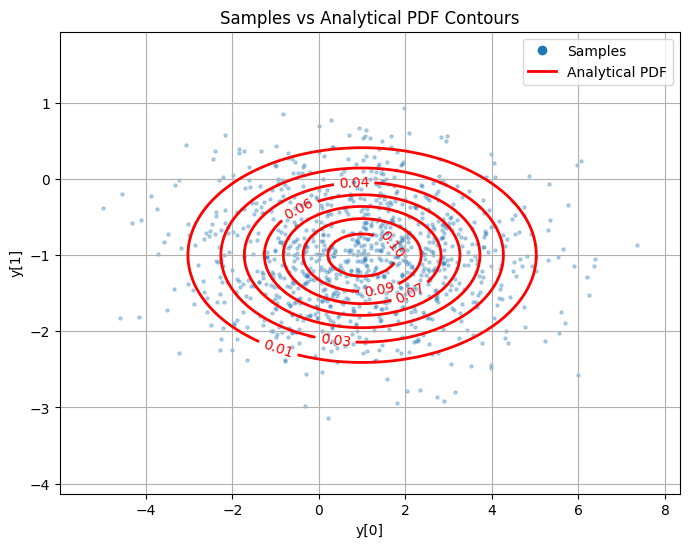

In [ ]:
# 1) Sample from base and apply affine flow using NumPy
np.random.seed(0)
n_samples = 1000
z = np.random.randn(n_samples, 2)           # z ~ N(0, I)
a = np.array([2.0, 0.7])
b = np.array([1.0, -1.0])
y = z * a + b                                # y in R²

# 2) Compute analytic PDF on a grid
nx, ny = 100, 100
x_min, x_max = y[:,0].min() - 1, y[:,0].max() + 1
y_min, y_max = y[:,1].min() - 1, y[:,1].max() + 1
x_grid = np.linspace(x_min, x_max, nx)
y_grid = np.linspace(y_min, y_max, ny)
Xg, Yg = np.meshgrid(x_grid, y_grid)

Z_inv = np.stack([ (Xg - b[0]) / a[0],
                   (Yg - b[1]) / a[1] ], axis=-1)
log_pz = -0.5 * np.sum(Z_inv**2, axis=-1) - (Z_inv.shape[-1]/2)*np.log(2*np.pi)
log_det = np.sum(np.log(np.abs(a)))
pdf_grid = np.exp(log_pz - log_det)

# 3) Plot scatter + analytical PDF contours
plt.figure(figsize=(8, 6))

sc = plt.scatter(y[:, 0], y[:, 1], s=5, alpha=0.3, color='C0')
cs = plt.contour(Xg, Yg, pdf_grid, levels=10, colors='red', linewidths=2)
plt.clabel(cs, inline=True, fmt="%.2f")

plt.title("Samples vs Analytical PDF Contours")
plt.xlabel("y[0]")
plt.ylabel("y[1]")

# Create proxy artists for legend
legend_handles = [
    Line2D([0], [0], marker='o', color='C0', linestyle='None', markersize=6, label='Samples'),
    Line2D([0], [0], color='red', lw=2, label='Analytical PDF')
]
plt.legend(handles=legend_handles, loc='upper right')

plt.grid(True)
plt.show()


#### **Autoregressive Models**

##### Intuition

Autoregressive models explicitly factorize the joint distribution of data into a product of conditional distributions using the probability chain rule. They generate data one element at a time, each step conditioned on all previously generated elements.

For an $n$-dimensional data point $(x_1, x_2, \dots, x_n)$ (e.g.\ pixels in an image), an autoregressive model defines:

$$
p(x_1, x_2, \dots, x_n)
= \prod_{i=1}^{n} p\bigl(x_i \,\bigm|\, x_1, x_2, \dots, x_{i-1}\bigr).
$$

Each conditional density $p(x_i \mid x_{<i})$ is modeled by a neural network that has access only to the previous inputs.

Because of this factorization, autoregressive models are **explicit likelihood** models: the joint likelihood
$$
p(x_{1:n})
$$
can be computed exactly by multiplying (or summing log-probabilities) of the conditionals, enabling direct **maximum likelihood estimation (MLE)** training.

##### Mathematical Principle

Maximize the exact data log-likelihood, which decomposes as:

$$
L_{\mathrm{AR}}
= \mathbb{E}_{x \sim \text{data}}
\sum_{i=1}^{n}
\log p_{\theta}\bigl(x_{i} \mid x_{1:i-1}\bigr).
$$

Each term is the log-probability assigned to the $i$-th element given the previous ones. The model (e.g.\ a neural network) outputs a predictive distribution for $x_i$ (for discrete $x_i$, typically a softmax over possible values or a parameterized distribution). Training uses gradient descent on this objective, which is just maximum likelihood.


##### Code Task

In [ ]:
key = jax.random.PRNGKey(1)

# Length of sequence to generate
N = 5
x = jnp.zeros(N)

# Sample the first element from N(0,1)
key, subkey = jax.random.split(key)
x = x.at[0].set(jax.random.normal(subkey))

# Sequentially sample each subsequent x[i] given x[i-1]
for i in range(1, N):
    key, subkey = jax.random.split(key)
    prev = x[i-1]
    # Define conditional mean as 0.5 * previous value (just a simple linear dependency)
    cond_mean = 0.5 * prev
    # Sample x_i ~ N(mean=0.5*x_{i-1}, variance=1)
    x = x.at[i].set(cond_mean + jax.random.normal(subkey))

print("Generated sequence from autoregressive model:", x)


Generated sequence from autoregressive model: [-0.24392003  0.8257915   0.52243686  0.99321586 -0.99770904]


In this code, we manually defined a simple autoregressive process. We start with $x_0 \sim \mathcal{N}(0,1)$. Then for each new index $i$, we sample $x_i$ from a normal distribution whose mean is 0.5 * x[i-1]. The result x is one sample from the joint distribution implicitly defined by this process.

### Latent-Variable Models

Latent-variable generative models assume that each observed data point $x$ is generated from an underlying (unobserved) latent variable $z$. They define a joint distribution $p_\theta(x,z) = p(z),p_\theta(x|z)$, where $p(z)$ is a prior over latent space (usually simple like $\mathcal{N}(0,I)$) and $p_\theta(x|z)$ (the decoder) is a deep network that outputs a distribution for $x$ given $z$. This introduces flexibility: by integrating over $z$, we obtain the model's marginal likelihood $p_\theta(x) = \int p(z),p_\theta(x|z),dz$. However, this integral is often intractable to compute or differentiate directly if $z$ is high-dimensional and $p_\theta(x|z)$ is complex. Variational Autoencoders (VAEs) address this by optimizing a lower bound on the log-likelihood using an approximate inference model (encoder). VAEs are explicit density models in the sense that they aim to model $p(x)$, but they do so via an approximate objective because the likelihood involves an intractable integral.

#### Variational Autoencoders (VAEs)

##### Intuition

A VAE consists of two parts:
*   Encoder (Inference Network) $q_\phi(z|x)$: a neural network that takes an input
$x$ and produces a distribution over latent code $z$ (often Gaussian). This is also called the recognition or posterior model. $\phi$ denotes the encoder parameters.
*   Decoder (Generative Network) $p_\theta(x|z)$: a neural network that takes a latent $z$ and outputs a distribution for $x$ (e.g. parameters of a Gaussian or Bernoulli over data). $\theta$ denotes the decoder parameters.

The encoder and decoder are trained jointly. The encoder serves to approximate the true posterior $p_\theta(z|x)$, which is intractable to compute exactly. The VAE training objective is to maximize the evidence lower bound (ELBO) on the log-likelihood of the data. This circumvents direct likelihood maximization by optimizing a surrogate objective that is easier to compute.

##### Mathematical Principle

For a given data point $x$, the ELBO is:

$$
\mathcal{L}(\theta, \phi; x)
= \mathbb{E}_{z \sim q_\phi(z \mid x)}\bigl[\log p_\theta(x \mid z)\bigr]
- D_{\mathrm{KL}}\bigl(q_\phi(z \mid x)\,\|\,p(z)\bigr).
$$



In the ELBO:
- The first term $\mathbb{E}_{z \sim q_\phi(z \mid x)}[\log p_\theta(x \mid z)]$ is a **reconstruction term**: it measures how well the decoder reconstructs $x$ from latent samples $z$ drawn from the encoder.
- The second term $D_{\mathrm{KL}}(q_\phi(z \mid x)\,\|\,p(z))$ is a **regularizer**: it keeps the encoder’s posterior close to the prior $p(z)$, preventing overfitting by encoding too much information in $z$.

In practice, $p(z)$ is often chosen as $\mathcal{N}(0, I)$, and $q_\phi(z \mid x)$ is modeled as a Gaussian with mean $\mu_\phi(x)$ and diagonal covariance $\Sigma_\phi(x)$ predicted by the encoder.

### Implicit Models

#### Generative Adversarial Networks (GANs)

##### Intuition

A GAN’s generator $G(z)$ takes a random input $z$ (usually $z \sim \mathcal{N}(0,I)$ or Uniform[0,1]) and maps it to a synthetic data sample $G(z)$. The discriminator $D(x)$ outputs a probability (or logit) that $x$ is real (from the training data) versus fake (from $G$). Training is a two-player minimax game: $D$ is trained to better discriminate real vs fake, while $G$ is simultaneously trained to fool $D$. At equilibrium, if the generator succeeds, the generated samples are distributed like the real data, and the discriminator is no better than random guessing (output $0.5$ for real/fake).

##### Mathematical Principle

The original GAN paper (Goodfellow et al. 2014) used the minimax objective:

$$
\min_{G}\;\max_{D}\;V(D,G)
= \mathbb{E}_{x \sim p_{\mathrm{data}}(x)}\bigl[\log D(x)\bigr]
\;+\;
\mathbb{E}_{z \sim p(z)}\bigl[\log\bigl(1 - D(G(z))\bigr)\bigr].
$$


This value function $V(D,G)$ encapsulates the two competing goals:
*  The discriminator $D$ tries to maximize this objective: it gets higher reward when it confidently classifies real data $x$ as real ($D(x) \approx 1 \implies \log D(x)$ large) and fake samples $G(z)$ as fake ($D(G(z)) \approx 0 \implies \log(1-D(G(z)))$ large).
*  The generator $G$ tries to minimize this objective: it can only affect the second term, and it benefits when $D(G(z))$ is pushed closer to 1 (so that $\log(1-D(G(z)))$ is low). In practice, one often uses the non-saturating variant of the loss for $G$, maximizing $\mathbb{E}_z [\log D(G(z))]$, for better gradients.

GAN training typically alternates gradient descent on $D$ and $G$. If $D$ is too strong, $G$ gets no signal; if $G$ becomes too good, $D$ might be fooled completely. Achieving stability is tricky. When successful, GANs can produce very sharp and realistic samples (especially in image generation). However, because GANs do not explicitly model $p(x)$, it's hard to evaluate their performance by likelihood; instead metrics like Inception Score or FID are used. GANs may also suffer from mode collapse (producing limited diversity).

### Stochastic Mapping Models (Diffusion Models)

Diffusion models are a class of generative models that define a forward-noising process and a learned reverse denoising process. The idea, inspired by non-equilibrium thermodynamics, is to start with data and gradually add random noise in $T$ small steps (forward diffusion), until the data is completely corrupted into pure noise (usually an isotropic Gaussian). Then, the model learns to reverse this process, gradually removing noise to transform pure noise into a sample from the data distribution. Diffusion models have become extremely successful for image generation (e.g. DDPMs, Stable Diffusion), audio generation, etc., often producing very high-quality samples.

##### Intuition

###### 1. Forward process
Define a Markov chain $x_0 \to x_1 \to \dots \to x_T$ with
$$
q(x_t \mid x_{t-1}) = \mathcal{N}\bigl(x_t;\,\sqrt{1-\beta_t}\,x_{t-1},\,\beta_t I\bigr),
$$
where $\{\beta_t\}_{t=1}^T$ is a small, increasing variance schedule (e.g.\ $\beta_1\approx10^{-4}$ to $\beta_T\approx0.02$).

###### 2. Closed‐form marginal
Sample $x_t$ directly from $x_0$:
$$
q(x_t \mid x_0) = \mathcal{N}\bigl(x_t;\,\sqrt{\bar\alpha_t}\,x_0,\,(1-\bar\alpha_t)I\bigr),
\quad
\bar\alpha_t = \prod_{s=1}^t(1-\beta_s).
$$

###### 3. Reverse (generative) process
Learn
$$
p_\theta(x_{t-1}\mid x_t)
= \mathcal{N}\bigl(x_{t-1};\,\mu_\theta(x_t,t),\,\Sigma_\theta(x_t,t)\bigr),
$$
where a neural network predicts $\mu_\theta$ (and optionally $\Sigma_\theta$).

###### 4. Training objective
Sample $t\in\{1,\dots,T\}$, $\epsilon\sim\mathcal{N}(0,I)$ and set
$$
x_t = \sqrt{\bar\alpha_t}\,x_0 + \sqrt{1-\bar\alpha_t}\,\epsilon.
$$
Minimize
$$
L = \mathbb{E}_{x_0,\epsilon,t}\bigl[\|\epsilon - \epsilon_\theta(x_t,t)\|^2\bigr].
$$

###### 5. Sampling
1. Draw $x_T\sim\mathcal{N}(0,I)$  
2. For $t=T,\dots,1$: sample $x_{t-1}\sim p_\theta(x_{t-1}\mid x_t)$  
3. Output $x_0$

**Notes**  
- Larger $T$ improves quality but slows sampling.  
- Variants use fewer steps or distillation for speed.


#####   Code Task

To illustrate the concept, let's simulate a few steps of a toy diffusion process on a 1D data point, and show how one reverse denoising step would work if we had a perfect model. We'll use a fixed $\alpha = 1-\beta$ for simplicity at each step.

In [ ]:
key = jax.random.PRNGKey(4)
x0 = jnp.array([2.0])  # 1-D array of shape (1,)

# Use .item() to extract a Python float from a 0-D or 1-D array
print("Original data x0:", x0.item())

# Forward diffusion: gradually add noise
alpha = 0.8  # keep 80% signal, add 20% noise at each step
T = 3        # number of diffusion steps
xt = x0
for t in range(1, T+1):
    key, subkey = jax.random.split(key)
    noise = jax.random.normal(subkey, shape=xt.shape)
    xt = jnp.sqrt(alpha) * xt + jnp.sqrt(1 - alpha) * noise
    print(f"Noisy x{t} after step {t}:", xt.item())

# Assume we have a perfect predictor for the noise at step T (just for illustration):
pred_noise = noise  # placeholder for a learned predictor
# One reverse denoising step from x_T to x_{T-1}:
x_recovered = (xt - jnp.sqrt(1 - alpha) * pred_noise) / jnp.sqrt(alpha)
print("Recovered x_{T-1} from x_T (using true noise):", x_recovered.item())


Original data x0: 2.0
Noisy x1 after step 1: 1.9465759992599487
Noisy x2 after step 2: 1.4307894706726074
Noisy x3 after step 3: 1.6343814134597778
Recovered x_{T-1} from x_T (using true noise): 1.4307894706726074


In this code:
* We start with x0 = 2.0 (just a number for demonstration).
* We run a forward diffusion for T=3 steps. Each step mixes the current $x_{t-1}$ with Gaussian noise (noise) according to a fixed $\alpha=0.8$. You can see xt becoming more noise-like each step.
* After 3 steps, x3 is a very noisy version of the original.
* For the reverse, we demonstrate one step of denoising: if the model could perfectly predict the noise that was added at that step (here we cheat by using the actual last noise), we can subtract the noise and divide by $\sqrt{\alpha}$ to recover an estimate of the previous $x$. In this case, since we had the true noise, one step perfectly recovers the previous value.

### Continuous Flow Models (Flow Matching and CNFs)

Continuous-flow models take the idea of normalizing flows to the continuous-time limit. Instead of a discrete sequence of transformations or diffusion steps, we define a continuum of infinitesimal transformations governed by an ordinary differential equation (ODE). These are known as Continuous Normalizing Flows (CNFs) or Neural ODEs when applied to generative modeling. The recently proposed Flow Matching technique is a training paradigm for such models. This family combines ideas from flows and diffusion: we still have an explicit mapping and likelihood, but it’s defined via integrating an ODE rather than a fixed sequence of layers.

#### Continuous Normalizing Flows (CNFs)

 A Continuous Normalizing Flow models the transformation from a base distribution to the data distribution as a continuous dynamics $x(t)$ for $t\in[0,1]$ (or $[0,T]$). At $t=0$, $x(0) \sim p_0$ is a base random variable (e.g. Gaussian). We have a time-dependent velocity field (or drift) $f_\theta(x,t)$ such that the ODE

$$
\frac{\mathrm{d}x(t)}{\mathrm{d}t} = f_{\theta}\bigl(x(t),t\bigr)
$$

steers $x(0)$ to become $x(1)$, which we hope to follow the data distribution $p_1$ (our target). Because the transform is invertible (under mild conditions), we can still compute densities. The instantaneous change in log-density under this ODE is given by the differential change of variables formula:


$$
\frac{\mathrm{d}}{\mathrm{d}t}\log p_{t}\bigl(x(t)\bigr)
= -\,\nabla_{x}\!\cdot f_{\theta}\bigl(x(t),t\bigr),
$$
where $\nabla_x \cdot f$ is the divergence of the vector field $f$ (sum of partial derivatives w.r.t. $x$). Intuitively, if $f_\theta$ is locally compressing space (negative divergence), density increases; if expanding (positive divergence), density decreases. Integrating this ODE from $t=0$ to $t=1$, we can compute the log-density at the end:
$$
\log p_{1}\bigl(x(1)\bigr)
= \log p_{0}\bigl(x(0)\bigr)
- \int_{0}^{1}
\nabla_{x}\!\cdot f_{\theta}\bigl(x(t),t\bigr)\,dt.
$$

In practice, to evaluate or train a CNF, one needs to solve this ODE for both $x(t)$ and simultaneously accumulate the integral of the divergence term. This can be done with an ODE solver (like a Runge-Kutta method) and can be made efficient using techniques from neural ODEs (e.g. adjoint method for backpropagation).

CNFs adapt the number of "flow steps" continuously – effectively using as many (infinitesimal) steps as needed to reach the desired accuracy, controlled by the ODE solver’s tolerance. They can be more memory-efficient (backprop via adjoint) and do not require each layer to have a tractable Jacobian determinant (since divergence can be estimated with autograd). However, CNFs can be slow to train and sample if the ODE integration takes many function evaluations.

##### Code Task

As a simple illustration of continuous flow, let's revisit the idea of mapping a 1D Gaussian to another 1D Gaussian with a different mean using an ODE. We know an optimal mapping in this case is just shifting by the difference in means (linearly over time). We'll simulate an ODE $d x/dt = u$ (constant) that shifts $x$ by $u$ over $t \in [0,1]$. If $u = \mu$ (the desired shift), this will transport $\mathcal{N}(0,1)$ to $\mathcal{N}(\mu,1)$ exactly.

In [ ]:

# ODE: dx/dt = u (constant vector field)
mu = 2.0         # we want to shift the mean by 2.0
def f(x, t):
    return mu    # constant drift

# Solve ODE with Euler method for demonstration
x = jnp.array(0.0)   # start at x(0) = 0.0 (could sample many points from N(0,1) instead)
dt = 0.1
t = 0.0
while t < 1.0:
    x = x + f(x, t) * dt
    t += dt

print("Start x(0)=0.0, end x(1)=", float(x))


Start x(0)=0.0, end x(1)= 2.200000286102295


In this example, we started with $x(0)=0$ and used Euler integration with $u=\mu=2.0$. After 1 second, x is approximately 2.0. If we had started with a distribution of many points from $\mathcal{N}(0,1)$ and applied this shift ODE, the distribution at $t=1$ would be $\mathcal{N}(2,1)$ (since shifting by 2 adds 2 to the mean, and an ODE with constant velocity field preserves relative distances, so variance stays the same, and there's no contraction/expansion because divergence = 0). We effectively performed a simple continuous normalizing flow. A more complex CNF would use a neural network for f(x,t) to handle complex data. One would use an ODE solver (instead of a fixed Euler loop) to ensure accuracy. During training, one can compute the log-likelihood of data by also integrating the log p ODE:
$$
\frac{\mathrm{d}}{\mathrm{d}t}\log p_{t}\bigl(x(t)\bigr)
= -\,\nabla_{x}\!\cdot f_{\theta}\bigl(x(t),t\bigr),
$$

which in code would mean accumulating $-\text{divergence}(f_\theta)$ along the trajectory (e.g., using autograd to get trace of Jacobian for divergence).

#### Flow Matching

Training a CNF traditionally involves backpropagating through a solver and matching the final density to data. Flow Matching (FM) is a newer approach that bypasses simulating the whole ODE during training. Instead, one specifies a family of intermediate distributions $q_t$ (a probability path from base to data) and then regresses the vector field $f_\theta(x,t)$ to match the prescribed change in those distributions. For example, one can choose $q_t$ to be the same as the forward noising process of a diffusion model (Gaussian interpolations between $p_0$ and $p_1$). Flow Matching provides a target vector field $u_t(x)$ that would carry out that interpolation (this $u_t$ can be derived or known in closed form for certain paths). Then $f_\theta$ is trained to approximate $u_t(x)$ for all $t$ by minimizing a mean squared error:

$$
\theta^{*} = \arg\min_{\theta} \; \mathbb{E}_{t,\,x \sim q_{t}}\Bigl[\|\,f_{\theta}(x,t) - u_{t}(x)\|^{2}\Bigr].
$$

This way, we avoid solving the ODE during training; we just need samples from $q_t$ (which is easy if $q_t$ is chosen conveniently, e.g. Gaussian blending of data and noise). Remarkably, Lipman et al. (2022) found that using diffusion-like paths $q_t$ in flow matching yields a stable training similar to diffusion models, but at the end you have a continuous flow model that can sample quickly via ODE solvers. FM can also use other paths like optimal transport which might yield faster convergence. After training, one integrates $d x/dt = f_\theta(x,t)$ from $t=0$ (base distribution sample) to $t=1$ to generate data. Flow Matching thus unifies diffusion and flow models: it trains a CNF using ideas from diffusion (predefined noise schedule) but without requiring stochastic sampling during training (hence "simulation-free"). This is an active research area, and it promises ODE-based generative models that train as easily as diffusion models but sample with fewer function evaluations.

##### Code Task

In [ ]:

# 1. sample a base point (x0) and choose a target (x1)
key = random.PRNGKey(0)
x0 = random.normal(key, (2,))          # x0 ~ N(0,I) in 2-D
x1 = jnp.array([2.0, -1.0])            # arbitrary target point on a ring, say

# 2. ground-truth FM velocity: constant vector from x0 to x1
u = x1 - x0                            #  u_gt(t, x_t) = x1 − x0  (linear path)

# 3. integrate dx/dt = u from t=0 to t=1 with Euler steps
dt = 0.05
t  = 0.0
x  = x0.copy()
while t < 1.0:
    x = x + u * dt                     # Euler update
    t += dt

# 4. results
print("Base sample  x0 =", x0)
print("Target point x1 =", x1)
print("Flow-matched x(1) ≈", x)        # should end close to x1


Base sample  x0 = [1.6226422 2.0252647]
Target point x1 = [ 2. -1.]
Flow-matched x(1) ≈ [ 1.9999992 -1.       ]


## Section 2: Real-world applications and interactive examples

In [ ]:
## Install and import other packages (see if required)
# @title Install and import demo packages. (Run Cell)

# Required?
# !pip install diffusers transformers accelerate torch torchvision
# !pip install controlnet-aux opencv-python pillow matplotlib


import torch
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import cv2

from PIL import Image, ImageEnhance
from controlnet_aux import CannyDetector
import ipywidgets as widgets
from IPython.display import display, HTML
import io
import base64
from huggingface_hub import login

### 2.1. Visual and Interactive Demonstrations

#### Welcome to the Magic of Generative AI! 🎨

In this interactive session, you'll experience the incredible power of diffusion models firsthand.
You'll draw simple sketches and watch as AI transforms them into stunning artwork!

What you'll learn:
- How diffusion models work conceptually
- The difference between different types of generative models
- Hands-on experience with state-of-the-art AI art generation

In [ ]:
# @title Download stable diffusion checkpoint. (Run Cell)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load ControlNet for Canny edge detection
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

# Load Stable Diffusion pipeline
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    safety_checker=None,
    requires_safety_checker=False
)
pipe = pipe.to(device)

print("Model loaded successfully!")

In [ ]:
# Load ControlNet model for Canny edge detection
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
def process_sketch(image_path):
    # Load and resize image
    image = Image.open(image_path).convert('RGB')
    image = image.resize((512, 512))

    # Convert to numpy for Canny detection
    image_np = np.array(image)

    # Apply Canny edge detection
    canny = cv2.Canny(image_np, 100, 200)
    canny_image = Image.fromarray(canny)

    return image, canny_image

def generate_art(sketch_path, prompt):
    # Process the sketch
    original, canny = process_sketch(sketch_path)

    # Generate enhanced image
    result = pipe(
        prompt=prompt,
        image=canny,
        num_inference_steps=120,
        guidance_scale=15
    ).images[0]

    return original, canny, result

#### Example 1: Sketch something

  0%|          | 0/120 [00:00<?, ?it/s]

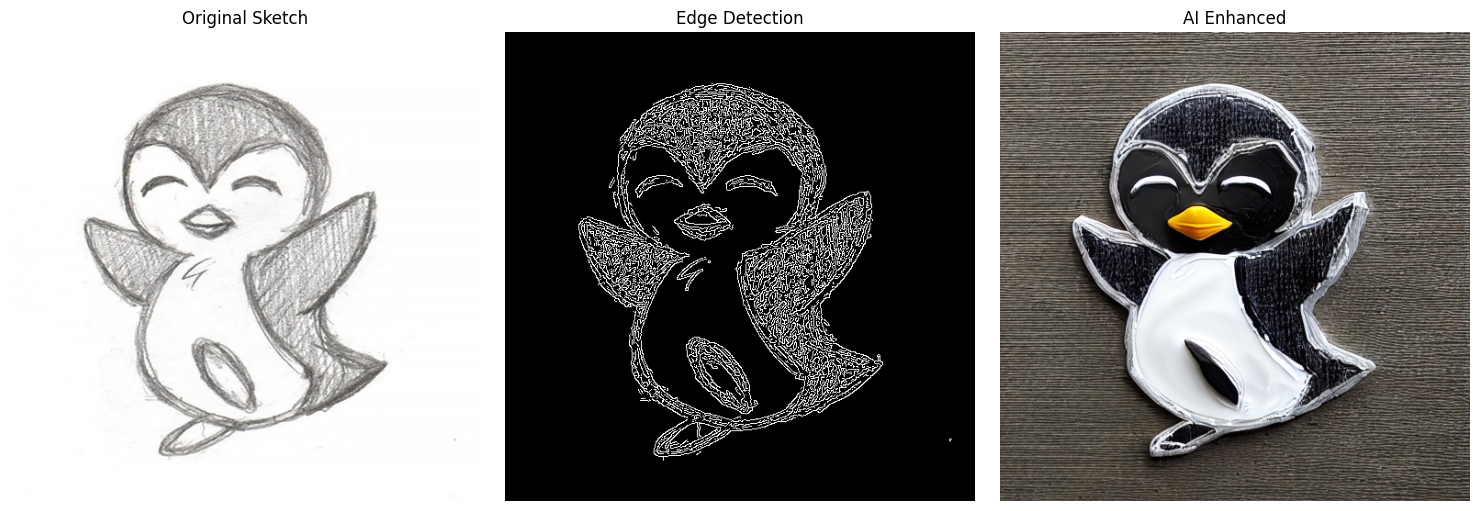

Enhanced artwork saved as 'enhanced_artwork.jpg'


In [ ]:
# Cell 4: Generate Art from Sketch
# Upload your sketch and set these variables:
sketch_path = "/content/my_sketch.png"  # Replace with your uploaded sketch path
prompt = "a happy pinguin, detailed, high quality"  # Your prompt here

# Generate the enhanced version
original, edges, enhanced = generate_art(sketch_path, prompt)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original)
axes[0].set_title("Original Sketch")
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection")
axes[1].axis('off')

axes[2].imshow(enhanced)
axes[2].set_title("AI Enhanced")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Save the result
enhanced.save("enhanced_artwork.jpg")
print("Enhanced artwork saved as 'enhanced_artwork.jpg'")

  0%|          | 0/120 [00:00<?, ?it/s]

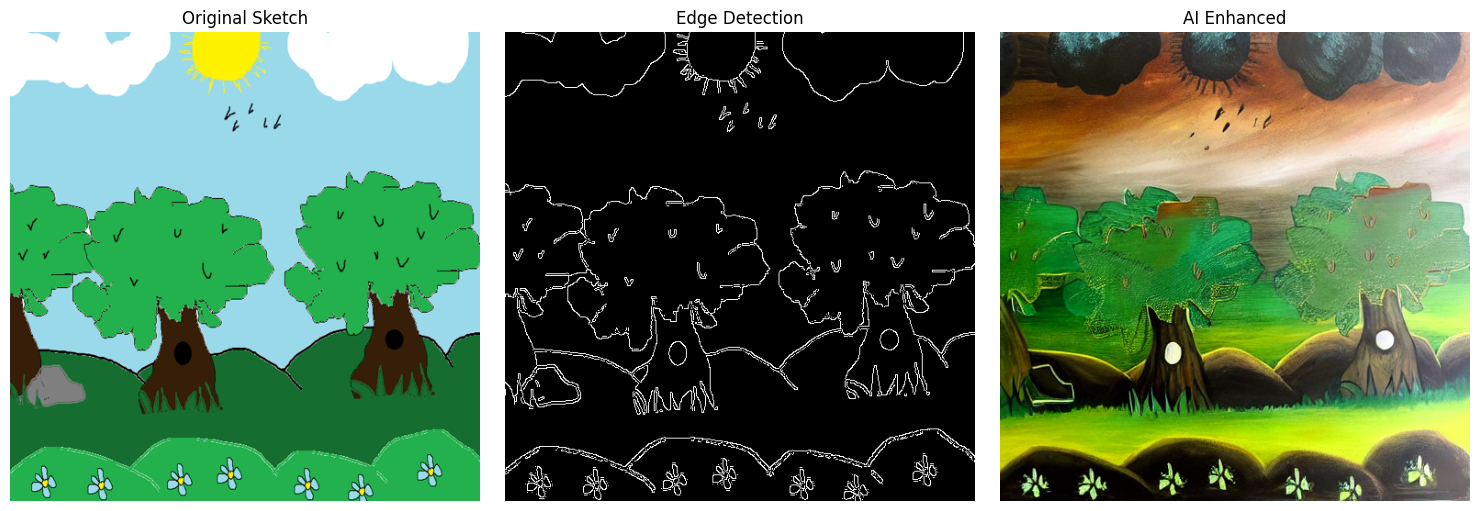

Enhanced artwork saved as 'enhanced_artwork.jpg'


In [ ]:
# Cell 4: Generate Art from Sketch
# Upload your sketch and set these variables:
sketch_path = "/content/my_sketch1.png"  # Replace with your uploaded sketch path
prompt = "a forest painting"  # Your prompt here

# Generate the enhanced version
original, edges, enhanced = generate_art(sketch_path, prompt)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original)
axes[0].set_title("Original Sketch")
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection")
axes[1].axis('off')

axes[2].imshow(enhanced)
axes[2].set_title("AI Enhanced")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Save the result
enhanced.save("enhanced_artwork.jpg")
print("Enhanced artwork saved as 'enhanced_artwork.jpg'")

#### Example 2: Designing your own ancient Roman sculpture!

  0%|          | 0/120 [00:00<?, ?it/s]

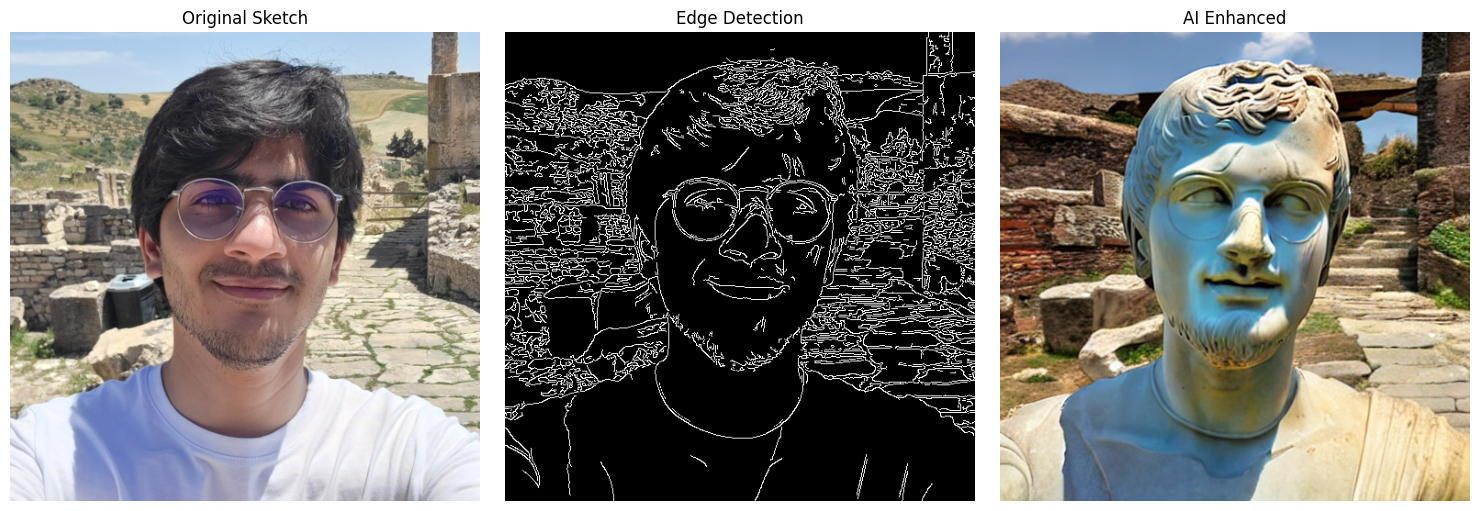

Enhanced artwork saved as 'enhanced_artwork.jpg'


In [ ]:
# Upload your sketch and set these variables:
sketch_path = "/content/my_photo.png"  # Replace with your uploaded sketch path
prompt = "ancient roman statue"  # Your prompt here

# Generate the enhanced version
original, edges, enhanced = generate_art(sketch_path, prompt)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original)
axes[0].set_title("Original Sketch")
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection")
axes[1].axis('off')

axes[2].imshow(enhanced)
axes[2].set_title("AI Enhanced")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Save the result
enhanced.save("enhanced_photo.jpg")
print("Enhanced artwork saved as 'enhanced_artwork.jpg'")

### 2.2 Application Areas [TODO]

### 2.3 Hands-On activity: Is it AI or is it Real? [TODO]

### 2.4 Ethical Concerns [TODO]

#### 2.4.1 Studio Ghibli fakes

#### 2.4.2 Sampling bias based on data distribution

#### 2.4.3 Deep Fakes in general


# [TEMPLATE SECTIONS TO BE REMOVED]

## **Sample Section 1**

[Background/content for the section.]

### Subsection - <font color='blue'>`Beginner`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Subsection - <font color='orange'>`Intermediate`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Subsection - <font color='green'>`Advanced`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Section Quiz

Optional end of section quiz. Below is an example of an assessment.

In [ ]:
# @title Generate Quiz Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/zbJoTSz3nfYq1VrY6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

## **Sample Section 2**

[Background/content for the section.]

### Subsection - <font color='blue'>`Beginner`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Subsection - <font color='orange'>`Intermediate`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Subsection - <font color='green'>`Advanced`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

**Group Task:**

Task that involves asking your neighbour or a group a question.

### Section Quiz

Optional end of section quiz. Below is an example of an assessment.

In [ ]:
# @title Generate Quiz Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/zbJoTSz3nfYq1VrY6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

# [END OF TEMPLATE SECTIONS]

## Conclusion
**Summary:**

[Summary of the main points/takeaways from the prac.]

**Next Steps:**

[Next steps for people who have completed the prac, like optional reading (e.g. blogs, papers, courses, youtube videos). This could also link to other pracs.]

**Appendix:**

[Anything (probably math heavy stuff) we don't have space for in the main practical sections.]

**References:**

[References for any content used in the notebook.]

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2022).

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />